# Experiment-4
Name of the Experiment: MNIST dataset classification using convolutional neural network
Algorithm:
1. Import libraries
2. Load and preprocess the dataset
3. Display sample images from the dataset
4. Normalize the images to the range [0, 1]
5. Reshape the images to add the channel dimension
6. Build the CNN model
7. Compile the model
8. Train the model with train set
9. Evaluate the model
10. Plot training and validation accuracy over epochs
Codes:

In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step
Sample images from the training set:


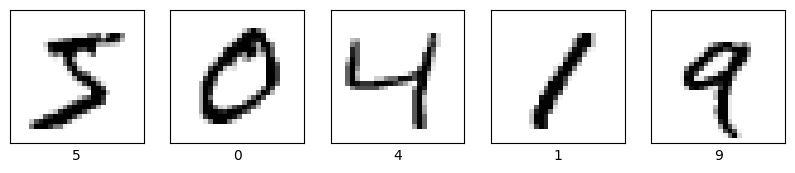


Sample images from the test set:


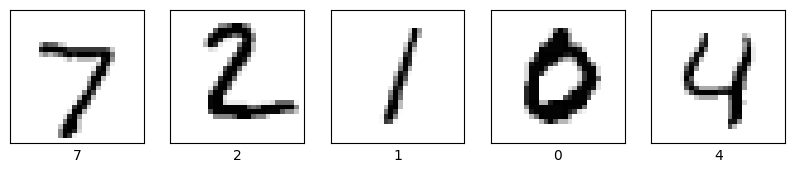

C:\Users\ANANDPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8893 - loss: 0.3498 - val_accuracy: 0.9817 - val_loss: 0.0567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9839 - loss: 0.0510 - val_accuracy: 0.9891 - val_loss: 0.0332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9898 - loss: 0.0340 - val_accuracy: 0.9902 - val_loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9916 - loss: 0.0263 - val_accuracy: 0.9894 - val_loss: 0.0318
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9912 - val_loss: 0.0308
313/313 - 1s - 3ms/step - accuracy: 0.9912 - loss: 0.0308

Test accuracy: 0.9911999702453613


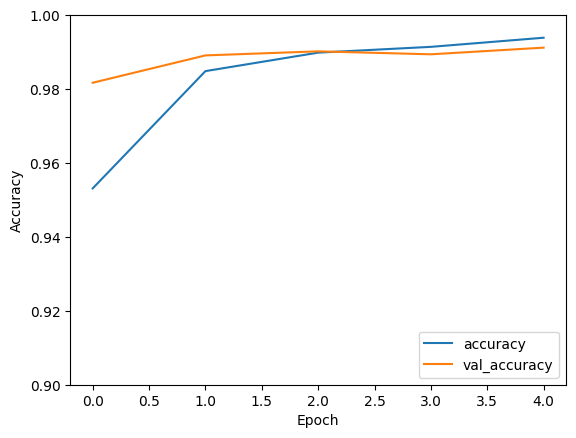

In [4]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Function to display sample images
def display_samples(images, labels, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

# Display sample images from the training set
print("Sample images from the training set:")
display_samples(train_images, train_labels)

# Display sample images from the test set
print("\nSample images from the test set:")
display_samples(test_images, test_labels)

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()
